## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [77]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind, ttest_1samp
from scipy.stats import f_oneway, shapiro, levene

import seaborn as sns
import matplotlib.pyplot as plt

pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [5]:
# Attack - Сила обычной атаки
pokemon_Grass = pokemon['Attack'][(pokemon['Class 1']=='Grass') & (pokemon['Class 2']!='Rock')]
pokemon_Rock = pokemon['Attack'][(pokemon['Class 1']=='Rock') & (pokemon['Class 2']!='Grass')]

In [6]:
stat, p = ttest_ind(pokemon_Grass, pokemon_Rock, equal_var=False)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, сила обычной атаки, вероятно, одинакова')
else:
    print('Отклоняем нулевую гипотезу, сила обычной атаки различается')

Статистика = -3.40410, p = 0.00113
Отклоняем нулевую гипотезу, сила обычной атаки различается


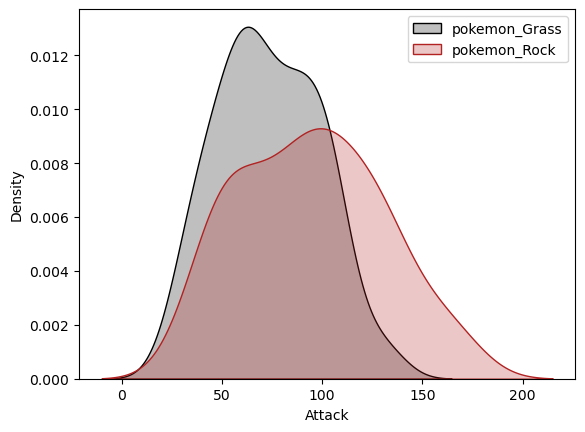

In [7]:
sns.kdeplot(pokemon_Grass, label="pokemon_Grass", fill = True, color = '#000000')
sns.kdeplot(pokemon_Rock, label="pokemon_Rock", fill = True, color = '#B22222')
plt.legend()
plt.show()

<Axes: >

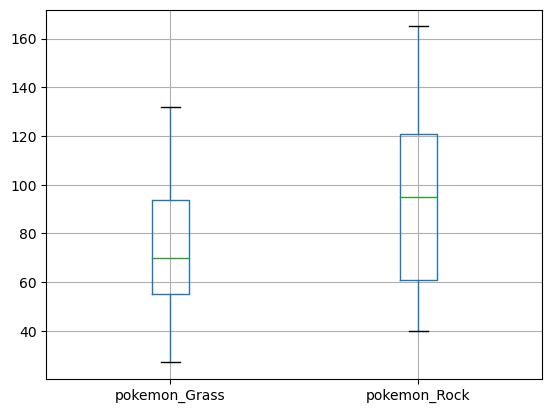

In [9]:
data =\
    pd.DataFrame({
        'pokemon_Grass': pokemon_Grass,
        'pokemon_Rock': pokemon_Rock
    })
data.boxplot() 

In [20]:
# Одновыборочный t-тест
stat, p = ttest_1samp(a=pokemon_Grass, popmean=pokemon['Attack'].mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средний показатель 'Grass', вероятно, не отличается от среднего по выборке")
else:
    print("Отклоняем нулевую гипотезу, средний показатель 'Grass', отличается от среднего по выборке")

Статистика = -1.908, p = 0.061
Не отклоняем нулевую гипотезу, средний показатель 'Grass', вероятно, не отличается от среднего по выборке


In [21]:
stat, p = ttest_1samp(a=pokemon_Rock, popmean=pokemon['Attack'].mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средний показатель 'Rock', вероятно, не отличается от среднего по выборке")
else:
    print("Отклоняем нулевую гипотезу, средний показатель 'Rock', отличается от среднего по выборке")

Статистика = 2.834, p = 0.007
Отклоняем нулевую гипотезу, средний показатель 'Rock', отличается от среднего по выборке


Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем покемоны в классе rock. Проверьте, прав ли он, и убедите его в своём выводе статистически. - НЕВЕРНО.

По результатам двухвыборочного t-теста для независимых выборок (st.ttest_ind) выявили статистически значимую разницу показателей. По графикам видим, что более сильная обычная атака в классе 'Rock'. На основании одновыборочного теста по показателю t-статистики подтверждаем, что более сильная обычная атака в классе 'Rock'.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

In [22]:
# Speed - Скорость движений
pokemon_Water = pokemon['Speed'][(pokemon['Class 1']=='Water') & (pokemon['Class 2']!='Normal')]
pokemon_Normal = pokemon['Speed'][(pokemon['Class 1']=='Normal') & (pokemon['Class 2']!='Water')]  

In [23]:
stat, p = ttest_ind(pokemon_Water, pokemon_Normal, equal_var=False)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, скорость движения, вероятно, одинакова')
else:
    print('Отклоняем нулевую гипотезу, скорости различаются')

Статистика = -1.54298, p = 0.12455
Не отклоняем нулевую гипотезу, скорость движения, вероятно, одинакова


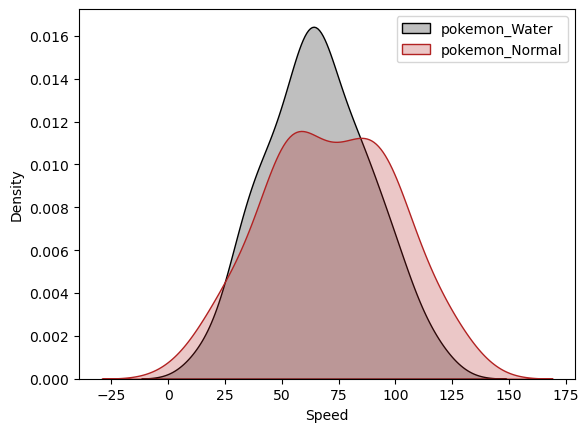

In [24]:
sns.kdeplot(pokemon_Water, label="pokemon_Water", fill = True, color = '#000000')
sns.kdeplot(pokemon_Normal, label="pokemon_Normal", fill = True, color = '#B22222')
plt.legend()
plt.show()

<Axes: >

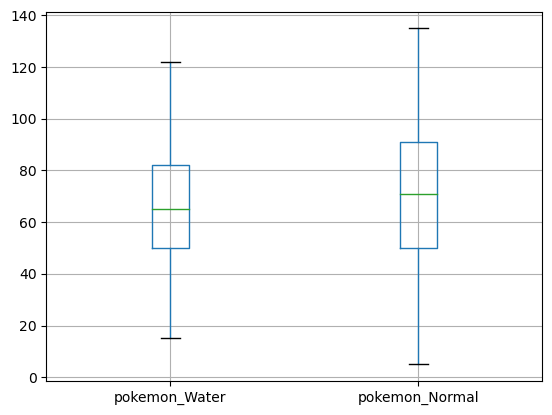

In [25]:
data =\
    pd.DataFrame({
        'pokemon_Water': pokemon_Water,
        'pokemon_Normal': pokemon_Normal
    })
data.boxplot() 

In [26]:
stat, p = ttest_1samp(a=pokemon_Water, popmean=pokemon['Speed'].mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средний показатель 'Water', вероятно, не отличается от среднего по выборке")
else:
    print("Отклоняем нулевую гипотезу, средний показатель 'Water', отличается от среднего по выборке")

Статистика = -1.063, p = 0.290
Не отклоняем нулевую гипотезу, средний показатель 'Water', вероятно, не отличается от среднего по выборке


In [27]:
stat, p = ttest_1samp(a=pokemon_Normal, popmean=pokemon['Speed'].mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средний показатель 'Normal', вероятно, не отличается от среднего по выборке")
else:
    print("Отклоняем нулевую гипотезу, средний показатель 'Normal', отличается от среднего по выборке")

Статистика = 1.131, p = 0.261
Не отклоняем нулевую гипотезу, средний показатель 'Normal', вероятно, не отличается от среднего по выборке


Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе Water в среднем быстрее, чем покемоны в классе Normal. - НЕВЕРНО.

По результатам двухвыборочного t-теста для независимых выборок (st.ttest_ind) выявили статистически значимую разницу показателей. По графикам видим, что покемоны 'Normal' немного быстрее 'Water'. На основании одновыборочного теста по показателю t-статистики подтверждаем, что быстрее покемоны в классе 'Normal'.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [28]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [30]:
def treathed (Name):
    if Name in treathed_pokemon:
        return 'Yes'
    else:
        return 'No'

In [31]:
pokemon['Treathed_pokemon'] = pokemon['Name'].apply(treathed)
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Treathed_pokemon
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,No
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,No
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,No
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,No
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,No


In [32]:
# Speed - Скорость движений
pokemon_Treathed = pokemon['Speed'][pokemon['Treathed_pokemon']=='Yes']
pokemon_NoTreathed = pokemon['Speed'][pokemon['Treathed_pokemon']=='No']

In [33]:
stat, p = ttest_ind(pokemon_Treathed, pokemon_NoTreathed, equal_var=False)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, скорость движения, вероятно, одинакова')
else:
    print('Отклоняем нулевую гипотезу, скорости различаются')

Статистика = 20.96392, p = 0.00008
Отклоняем нулевую гипотезу, скорости различаются


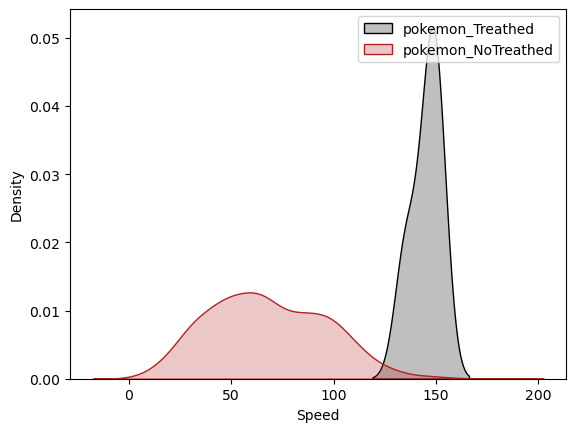

In [34]:
sns.kdeplot(pokemon_Treathed, label="pokemon_Treathed", fill = True, color = '#000000')
sns.kdeplot(pokemon_NoTreathed, label="pokemon_NoTreathed", fill = True, color = '#B22222')
plt.legend()
plt.show()

<Axes: >

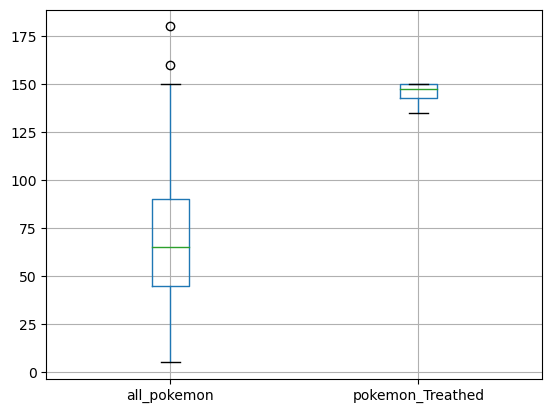

In [35]:
data =\
    pd.DataFrame({
        'all_pokemon': pokemon['Speed'],
        'pokemon_Treathed': pokemon_Treathed
    })
data.boxplot() 

Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Профессор дал эту сыворотку некоторым покемонам (массив treathed_pokemon). Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.

По результатам двухвыборочного t-теста для независимых выборок (st.ttest_ind) выявили статистически значимую разницу показателей. По графику видим, что показатели различны, сыворотка treathed_pokemon работает.
Также сравнивая скорость treathed-покемонов со скоростью всех покемонов видим значительное увеличение скорости по группе treathed_pokemon.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [78]:
pokemon['Characteristic_Sum'] = pokemon[['HP', 'Attack', 'Defense']].sum(axis=1) 
pokemon['Characteristic_Mul'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']
pokemon.head(2)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Characteristic_Sum,Characteristic_Mul
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360


In [79]:
pokemon_Legendary_Sum = pokemon['Characteristic_Sum'][pokemon['Legendary']==True]
pokemon_NoLegendary_Sum = pokemon['Characteristic_Sum'][pokemon['Legendary']==False]

In [80]:
pokemon_Legendary_Mul = pokemon['Characteristic_Mul'][pokemon['Legendary']==True]
pokemon_NoLegendary_Mul = pokemon['Characteristic_Mul'][pokemon['Legendary']==False]

In [81]:
pokemon.groupby('Legendary')['Characteristic_Sum'].mean()

Legendary
False    214.410884
True     309.076923
Name: Characteristic_Sum, dtype: float64

In [82]:
pokemon.groupby('Legendary')['Characteristic_Mul'].mean()

Legendary
False    4.250414e+05
True     1.085942e+06
Name: Characteristic_Mul, dtype: float64

In [83]:
stat, p = ttest_ind(pokemon_Legendary_Sum, pokemon_NoLegendary_Sum, equal_var=False)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, сумма, вероятно, одинакова')
else:
    print('Отклоняем нулевую гипотезу, сумма различна')

Статистика = 15.19759, p = 0.00000
Отклоняем нулевую гипотезу, сумма различна


In [84]:
stat, p = ttest_ind(pokemon_Legendary_Mul, pokemon_NoLegendary_Mul, equal_var=False)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, произведение, вероятно, одинаково')
else:
    print('Отклоняем нулевую гипотезу, произведение различно')

Статистика = 10.07908, p = 0.00000
Отклоняем нулевую гипотезу, произведение различно


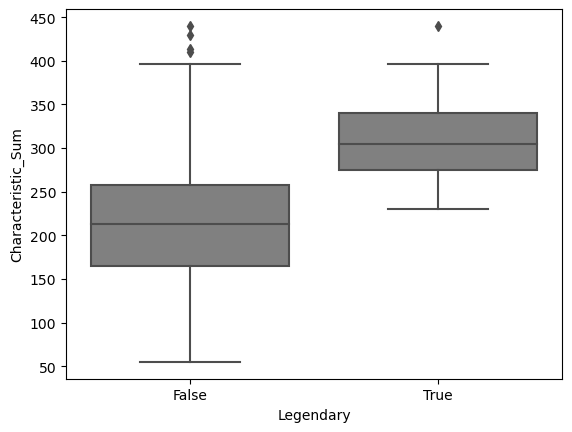

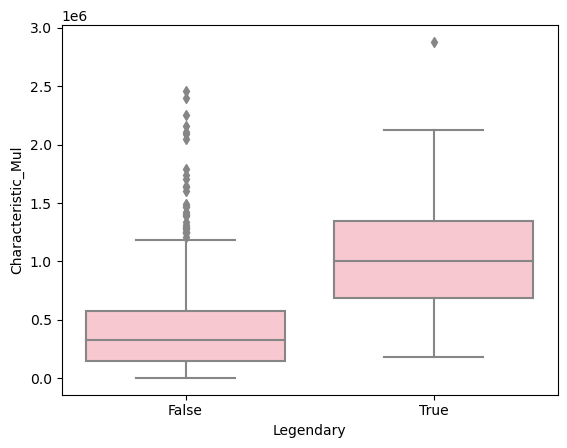

In [85]:
ax = sns.boxplot(x='Legendary', y='Characteristic_Sum', data=pokemon, color='grey')
plt.show()

ax = sns.boxplot(x='Legendary', y='Characteristic_Mul', data=pokemon, color='pink')
plt.show()

Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Действительно ли сумма характеристик HP, Attack, Defense у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?

Да, ВЕРНО.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [88]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [89]:
pokemon_Defense = pokemon[pokemon['Class 1'].isin(best_defence_class)]
pokemon_Defense[['Class 1', 'Defense']].head()

,Class 1,Defense
32,Ground,85
33,Ground,110
55,Ground,25
56,Ground,50
80,Rock,100


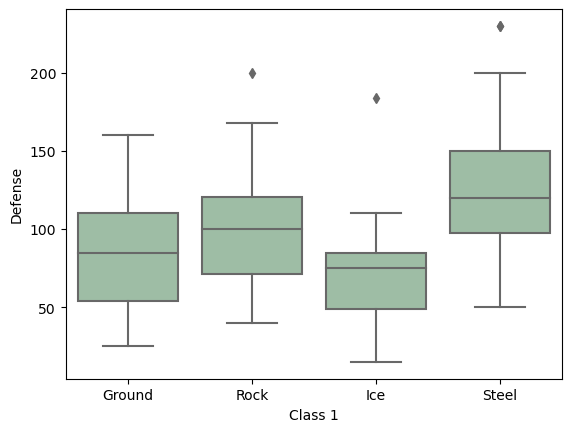

In [92]:
ax = sns.boxplot(x='Class 1', y='Defense', data=pokemon_Defense, color='#99c2a2')
plt.show()

In [94]:
fvalue, pvalue = f_oneway(pokemon_Defense[pokemon_Defense['Class 1'] == 'Rock']['Defense'], \
                                pokemon_Defense[pokemon_Defense['Class 1'] == 'Ground']['Defense'], \
                                pokemon_Defense[pokemon_Defense['Class 1'] == 'Ice']['Defense'], \
                                pokemon_Defense[pokemon_Defense['Class 1'] == 'Steel']['Defense'])

print('Статистика=%.3f, p=%.6f' % (fvalue, pvalue))
if pvalue > 0.05:
    print('Классы покемонов не отличаются по уровню защиты статистически значимо.')
else:
    print('Классы покемонов отличаются по уровню защиты статистически значимо.')

Статистика=10.577, p=0.000003
Классы покемонов отличаются по уровню защиты статистически значимо.


In [95]:
# Чтобы выяснить, какие именно группы отличаются друг от друга, проводим апостериорный тест.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=pokemon_Defense['Defense'].values,
                          groups=pokemon_Defense['Class 1'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice -13.4271 0.5457 -39.7195 12.8653  False
Ground   Rock  15.9517 0.2613  -6.6698 38.5733  False
Ground  Steel  41.5266 0.0002  16.0826 66.9707   True
   Ice   Rock  29.3788 0.0128   4.6707 54.0869   True
   Ice  Steel  54.9537    0.0  27.6379 82.2695   True
  Rock  Steel  25.5749   0.03   1.7716 49.3783   True
-----------------------------------------------------


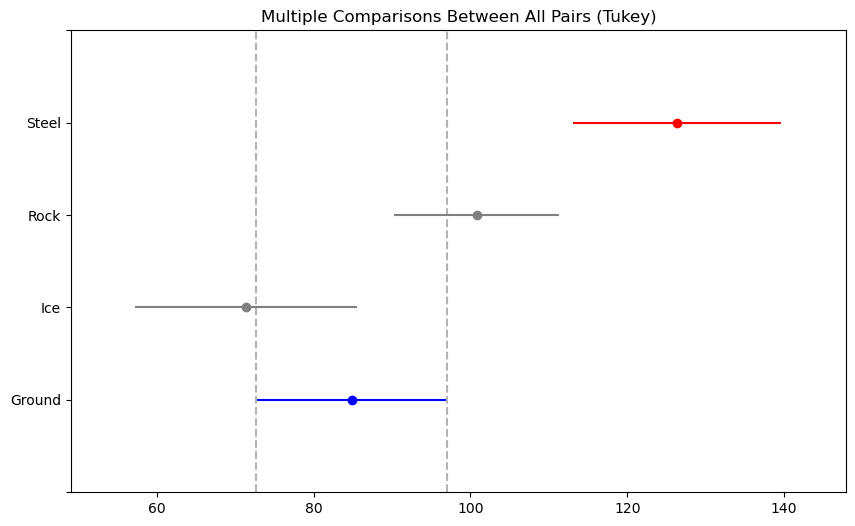

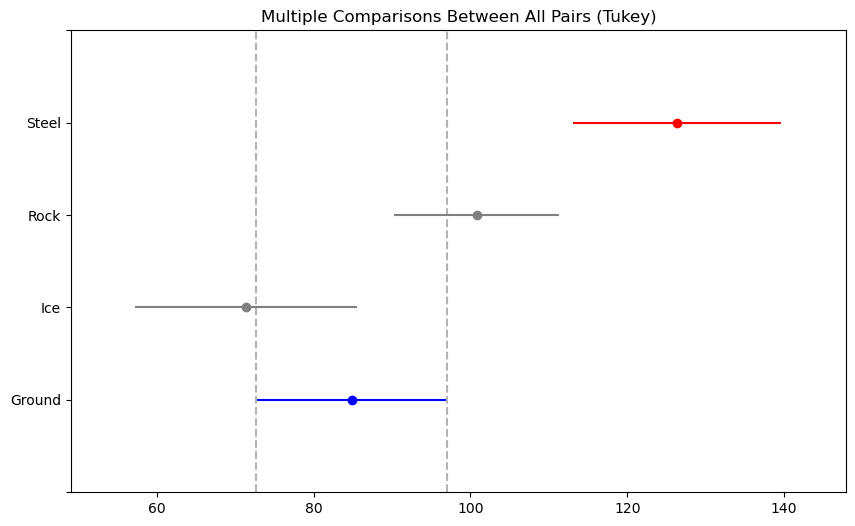

In [91]:
tukey.plot_simultaneous(comparison_name="Ground")

На основании теста Тьюкки мы можем заключить, что существует статистически значимая разница между средними значениями групп 'Ground' и 'Steel', групп 'Ice' и 'Rock', 'Ice' и 'Steel', 'Rock' и 'Steel'.

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.